<h1><center><font size = 10>DS Tools 2: Assignment 2</font></center></h1>
<h1><center><font size = 5>Author: Zach Chase</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
tax_training_df = pd.read_csv('train.csv', index_col='Unnamed: 0')
tax_training_df['cheat'] = tax_training_df['cheat'].map({'yes': 1, 'no': 0})

In [3]:
tax_training_df

,refund,marital_status,income_above_80k,cheat
1,yes,single,yes,0
2,no,married,yes,0
3,no,single,no,0
4,yes,married,yes,0
5,no,divorced,yes,1
6,no,married,no,0
7,yes,divorced,yes,0
8,no,single,yes,1
9,no,married,no,0
10,no,single,yes,1


# Question 1
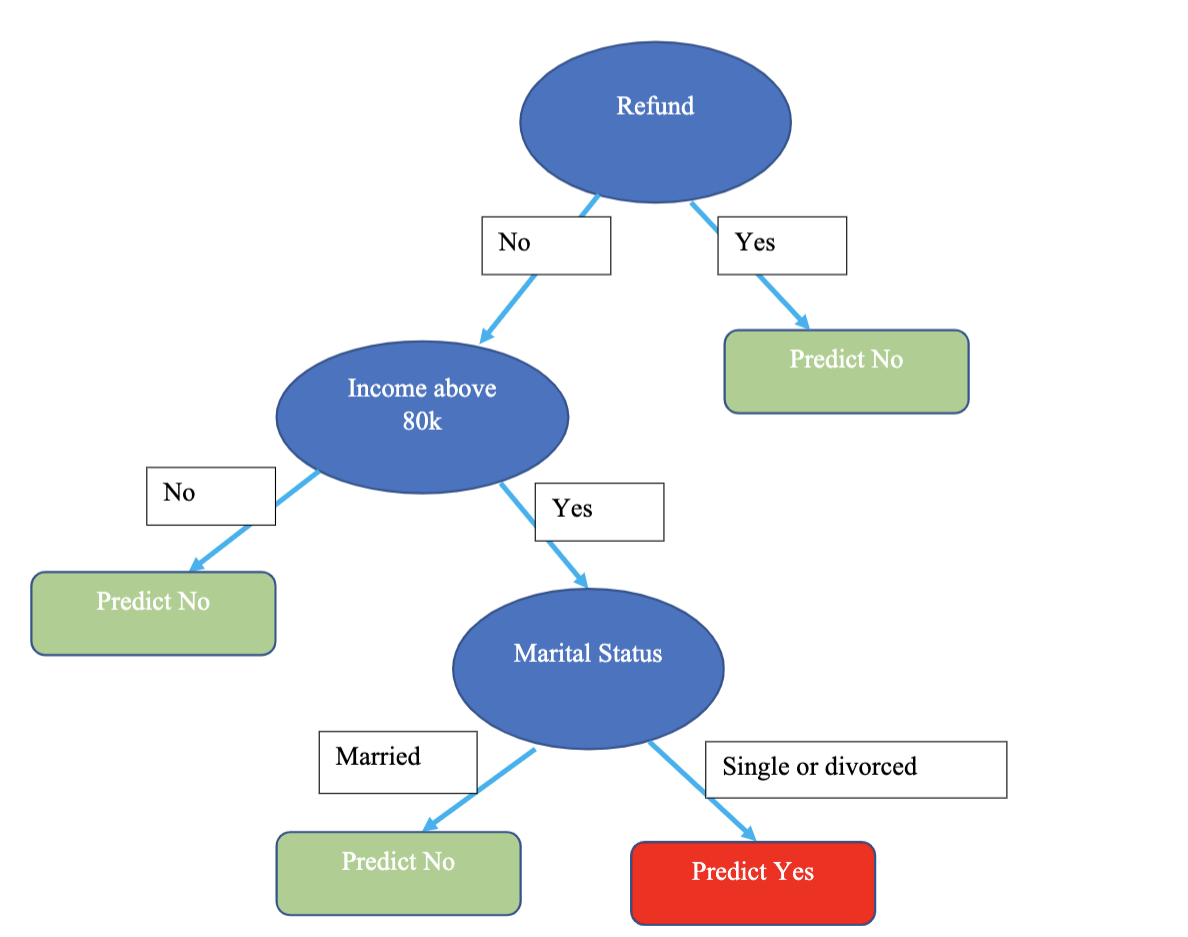
## Part a
Write an IF-THEN rule derived from this decision tree, that can be used to classify 
instances in the data suppose your desire is to predict “yes” for the output variable. 

R1: IF refund = "no" AND income_above_80k = "no" Then cheat = "no"

R2: IF refund = "no" AND income_above_80k = "yes" AND marital_status = "married" Then cheat = "no"

R3: IF refund = "no" AND income_above_80k = "yes" AND marital_status = "single" OR "divorced" Then cheat = "yes"

R4: Rf refund = "yes" Then cheat = "no"

R = R1 ⋁ R2 ⋁ R3 ⋁ R4

## Part b
In code, create a function with an if-else statement to implement the rule you wrote above 
in question 1a. You can name the function predict. The function takes the input data and 
returns a vector of predicted output values. You can decide if you want your function’s 
input data argument to be a numpy array or a data frame, ,then structure your function 
body to process the input data accordingly. Provide some brief document of your 
function. You can loop through each instance in the input data and assess whether the 
instance satisfies the rule for predicting “yes” or not. If the instance satisfies the rule for 
predicting “yes”, then predict 1, otherwise, predict 0. 

In [4]:
def predict(df):
    guesses = []
    for index, row in df.iterrows():
        if row['refund'] == "no" and row['income_above_80k'] == 'yes' and (row['marital_status'] == 'single' or row['marital_status'] == 'divorced'):
            guesses.append(1)
        else:
            guesses.append(0)
    return np.array(guesses)

In [5]:
predict(tax_training_df)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

## Part c
Create another function that implements the rule for predicting “yes” for the output, but 
this time, you will not use if-else statement or a loop. Rather use numpy arrays, matrices 
or vector to vectorize your code for faster and more efficient implementation. If the 
instance satisfies the rule for predicting “yes”, then predict 1, otherwise, predict 0. You 
can use logical operators for such implementation to compare values of test instances to 
values of attributes in the rule. This function still takes the input data and returns a vector 
of predicted values. You can call this function vectorized_predict. 

In [6]:
def vectorized_predict(df):
    
    guesses = np.zeros(df.shape[0])
    
    data = df.to_numpy()
    
    cheat = np.where((data[:,0] == 'no') & (data[:,2] == 'yes') & ((data[:,1] == 'single') | (data[:,1] == 'divorced')))
    
    guesses[cheat] = 1
    
    return guesses


In [7]:
vectorized_predict(tax_training_df)

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])

## Part d
Select the input data (refund, marital_status, income_above_80k) in the training data and 
apply your predict function to the input data to predict the outcome values of the input 
data. Your function should return a vector of predicted values. 

In [8]:
predictions = predict(tax_training_df)
predictions

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

## Part e
Select the input data (refund, marital_status, income_above_80k) in the training data and 
apply your vectorized_predict function to the input data to predict the outcome values of 
the input data. Your function should return a vector of predicted values. Are the predicted 
values with the vectorized_predict function the same as the predicted values obtained 
through the predict function? (you should have the same results). 

In [9]:
predictions_vectorized = vectorized_predict(tax_training_df)
predictions_vectorized

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 1.])

In [10]:
predictions == predictions_vectorized

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Part f
Include the predicted values as a column to the training data and name that column 
predicted_cheat. 

In [11]:
tax_training_df['predicted_cheat'] = predictions

# Part g
Create a function that computes the overall accuracy of the classification. You can call 
this function overall_accuracy. The function should take two arguments, a vector of actual output values and a vector of predicted output values, then returns the 
classification accuracy. Inside the function, you can use boolean logic to compare the 
actual and predicted values, then count the proportion of how many predicted values are 
equal to the actual values to get the overall accuracy. 

In [12]:
def overall_accuracy(actual, predictions):
    
    return sum(actual == predictions)/len(actual)

In [13]:
overall_accuracy(tax_training_df['cheat'], tax_training_df['predicted_cheat'])

1.0

## Part h
Create a confusion matrix using the predicted and actual output values. You can use 
pandas crosstab function. 

In [14]:
pd.crosstab(tax_training_df['cheat'], tax_training_df['predicted_cheat'])

predicted_cheat,0,1
cheat,,
0,7,0
1,0,3


## Part i
Apply the vectorized_predict function to the input of the test dataset to predict the 
output values for the test dataset. Include these predicted values as a column to the test 
dataset and called this column predicted_cheat. 

In [15]:
tax_test_df = pd.read_csv('test.csv', index_col='Unnamed: 0')
tax_test_df['cheat'] = tax_test_df['cheat'].map({'yes':1, 'no':0})
test_predictions = vectorized_predict(tax_test_df)
tax_test_df['predicted_cheat'] = test_predictions
tax_test_df

,refund,marital_status,income_above_80k,cheat,predicted_cheat
1,no,single,yes,0,1.0
2,no,single,yes,0,1.0
3,no,married,yes,0,0.0
4,no,divorced,no,0,0.0
5,no,married,yes,0,0.0
6,no,single,yes,0,1.0
7,yes,single,yes,0,0.0
8,no,single,yes,1,1.0
9,yes,married,yes,1,0.0
10,yes,single,no,1,0.0


## Part j
Apply the overall_accuracy function to the predicted out values and actual output values 
of the test set to compute the overall accuracy. Compare the overall accuracy of the test 
set and that of the training set. Is there overfitting? Why or why not? If there is 
overfitting, what would you do to avoid overfitting the rule to the training set? 

In [16]:
overall_accuracy(tax_test_df['cheat'], tax_test_df['predicted_cheat'])

0.5

In [17]:
overall_accuracy(tax_training_df['cheat'], tax_training_df['predicted_cheat'])

1.0

# Question 2
## Part a
Given the training dataset in question 1, write a function that computes the entropy of 
output variable. The function should take the entire training dataset, and the name of the 
output variable as arguments and return the entropy value. You can call the function, 
entropy. 

In [18]:
train = pd.read_csv("train.csv", index_col='Unnamed: 0')
train['cheat'] = train['cheat'].map({'yes': 1, 'no': 0})

In [19]:
train

,refund,marital_status,income_above_80k,cheat
1,yes,single,yes,0
2,no,married,yes,0
3,no,single,no,0
4,yes,married,yes,0
5,no,divorced,yes,1
6,no,married,no,0
7,yes,divorced,yes,0
8,no,single,yes,1
9,no,married,no,0
10,no,single,yes,1


In [20]:
def entropy(df, output):

    
    current_sum = 0
    
    for i in set(df[output]):
        p = len(np.where(df[output] == i)[0])/df.shape[0]
        current_sum += (p * math.log2(p))
    
    return -current_sum
entropy(train, 'cheat')

0.8812908992306927

## Part b
Create another function that takes the dataset, the name of the output variable, and a 
specific input variable as arguments and returns the information gain for a split of the 
data on that specific input variable. You can call the function, information_gain. 

In [21]:
def information_gain(df, output_variable, input_variable):
    
    current_sum = 0
    
    S = df.shape[0]
    
    for i in set(df[input_variable]):
        current_sum += (len(np.where(df[input_variable] == i)[0]) / S) * entropy(df[df[input_variable]==i], output_variable)
    
    return entropy(df, output_variable) - current_sum



In [22]:
for i in ['refund', 'marital_status', 'income_above_80k']:
    print(str(i) + ": " + str(information_gain(train, 'cheat', i)))

refund: 0.19163120400671663
marital_status: 0.2812908992306926
income_above_80k: 0.19163120400671663


## Part c
Do a cross tabulation using the best attribute obtained in 2b above and the output variable 
in the training dataset. 

In [23]:
pd.crosstab(train['cheat'], train['marital_status'])

marital_status,divorced,married,single
cheat,,,
0,1,4,2
1,1,0,2


## Part d
Draw a decision tree (use shapes in the word document) to show how the best variable 
can be used for classification. This is a decision tree with a single node or single variable. 

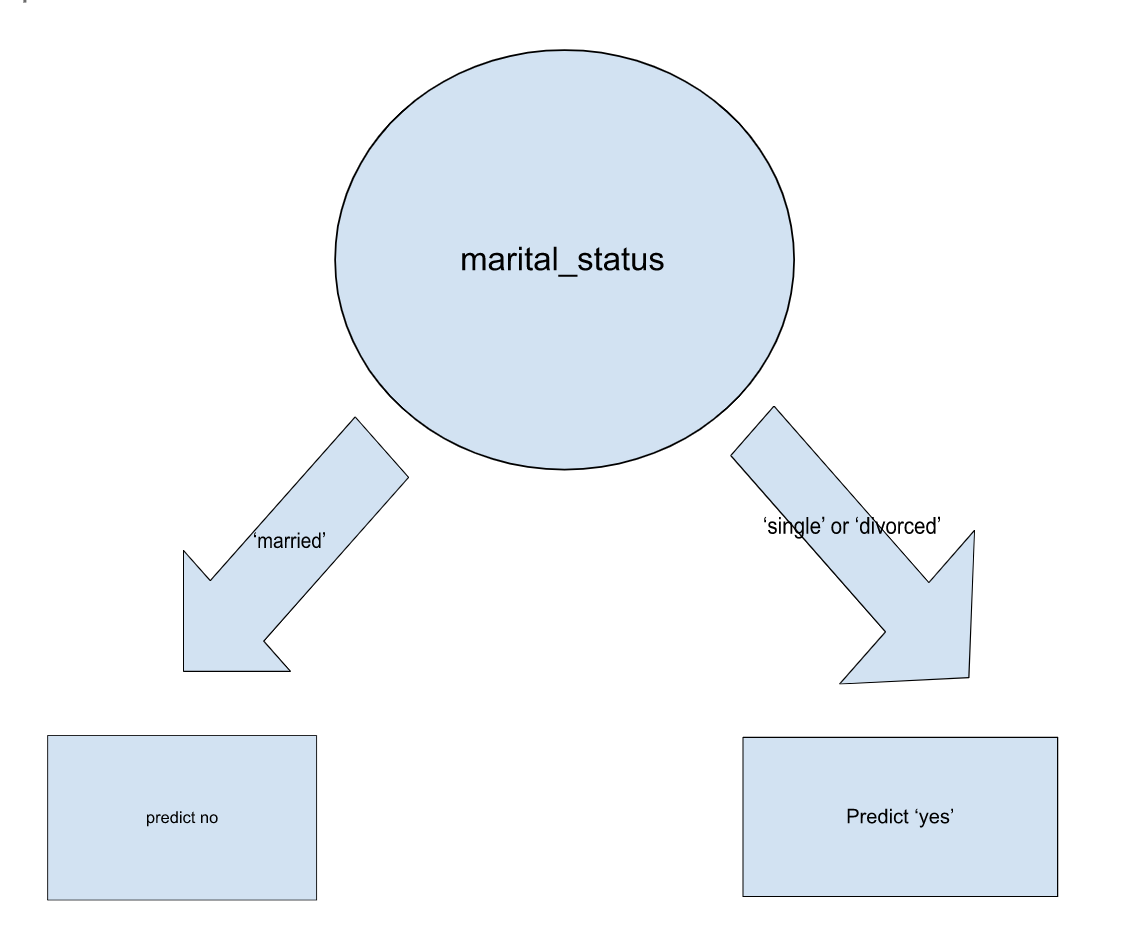

## Part e
Create a one-rule from the decision tree in 2d. The rule should containing an antecedent 
and a consequent. The antecedent should use only the best attribute and it’s value or 
values. 

Rule:

  marital_status: 
    
    married->No
    
    single->Yes
    
    divorced->Yes

## Part f
Using the antecedent of your rule, extract the data covered by the rule and compute the 
coverage of the rule. 

Coverage = Number of Instances Covered by Rule/Total Number of Instances in D = 10/10 = 100%


## Part g
Using the antecedent and precedent of your rule, extract the data covered by the rule and 
compute the accuracy of the rule. 

Accuracy = Number of Instances Covered and Correctly Predicted/Total Number of Instances in D = 7/10 = 70%

## Part h
Create a function that implents the rule as an if-else statement to predict the outcomes of 
any instance (a vector of values associated with the input variables for a specific 
individual). The function should be able to take one or more instances as an argument in 
the form of a dataframe or numpy arrary. 

In [24]:
def predict_from_marital_status(df, var):
    
    guesses = []
    for index, row in df.iterrows():
        if row['marital_status'] == "married": 
            guesses.append(0)
        else:
            guesses.append(1)
    return np.array(guesses)

## Part i
Implemement the function on the training set and test set in question 1 to get the 
predicted outputs for the training set and test set.  

In [25]:
predict_from_marital_status(train, 'marital_status')

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

## Part j
What is the overall prediction accuracies for the training set and test set? You can use the 
overall_accuracy function you initially defined. 

In [26]:
overall_accuracy(predict_from_marital_status(train, 'marital_status'), train['cheat'])

0.7

## Part k
Do you think there is overfitting or underfitting? Why or why not? 

I think that this specific model is underfitting. First off, the model currently only uses one variable for predictions, while ignoring the other features such as income and if a refund was filed. Additionally, this model only has an accuracy of 70%, which should be improved based off of the results discovered from problem 1.